**Name** - Vasu Bansal

**Roll No.** - 045055

# Segmentation of Consumers using Bank Defaulters Data

## Objectives -
1. Identification of the best variables for clustering and analysing whether an applicant will default on a loan, so that the bank can effectively segement customers
2. Segmentation of Consumer Data from identified variables using Unsupervised Machine Learning Clustering Algorithms
3. Identification of Appropriate Number of Segments or Clusters
4. Determination of Segment or Cluster Characteristics

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

df = pd.read_csv("bank defaulter dataset.csv")

## Data Description

**Source-** This Dataset is taken from Kaggle, who in turn took it from MachineHack - Deloitte Hackathon.

**Size of the Dataset**

In [14]:
import os

file_name= "bank defaulter dataset.csv"
print("Size of Dataset is {} bytes".format(os.path.getsize(file_name)))
print("Size of Dataset is {} MB".format(os.path.getsize(file_name)>>20))

Size of Dataset is 16484188 bytes
Size of Dataset is 15 MB


In [42]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Batch Enrolled_encoded,Grade_encoded,Sub Grade_encoded,Employment Duration_encoded,Verification Status_encoded,Payment Plan_encoded,Loan Title_encoded,Initial List Status_encoded,Application Type_encoded,Cluster
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,16.0,1.0,13.0,0.0,0.0,0.0,42.0,1.0,0.0,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,4.0,2.0,17.0,2.0,1.0,0.0,49.0,0.0,0.0,1
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,11.0,5.0,18.0,0.0,1.0,0.0,42.0,1.0,0.0,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,15.0,2.0,12.0,0.0,1.0,0.0,49.0,1.0,0.0,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,32.0,2.0,18.0,0.0,1.0,0.0,38.0,1.0,0.0,3


In [43]:
df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Batch Enrolled_encoded,Grade_encoded,Sub Grade_encoded,Employment Duration_encoded,Verification Status_encoded,Payment Plan_encoded,Loan Title_encoded,Initial List Status_encoded,Application Type_encoded,Cluster
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,67463.000000,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,18.875947,1.815558,11.963002,0.819145,1.025629,0.0,45.270800,0.538058,0.001823,0.729822
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,11.346994,1.382840,7.405069,0.929574,0.713905,0.0,11.070474,0.498553,0.042661,0.918893
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,9.000000,1.000000,6.000000,0.000000,1.000000,0.0,38.000000,0.000000,0.000000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,19.000000,2.000000,11.000000,0.000000,1.000000,0.0,42.000000,1.000000,0.000000,1.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,28.000000,3.000000,17.000000,2.000000,2.000000,0.0,49.000000,1.000000,0.000000,1.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,40.000000,6.000000,34.000000,2.000000,2.000000,0.0,108.000000,1.000000,1.000000,3.000000


**Data Shape**

In [15]:
print("Basic Info about the Dataset:")
print()
print(df.info())
print()
print("Dataset shape - ",df.shape)

Basic Info about the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                 

## Description of Variables

**Finding Index Variables**

In [16]:
import pandas as pd

# List to store index variables
index_variables = []

# Iterate through columns and identify index variables
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        index_variables.append(col)

# Display and save index variables separately
print("Index Variables:")
for var in index_variables:
    print(var)

# Save index variables DataFrame to a new CSV file
index_variables_df = df[index_variables]
index_variables_df.to_csv('index_variables.csv', index=False)


Index Variables:
ID
Loan Amount
Funded Amount
Funded Amount Investor
Term
Interest Rate
Home Ownership
Debit to Income
Delinquency - two years
Inquires - six months
Open Account
Public Record
Revolving Balance
Revolving Utilities
Total Accounts
Total Received Interest
Total Received Late Fee
Recoveries
Collection Recovery Fee
Collection 12 months Medical
Last week Pay
Accounts Delinquent
Total Collection Amount
Total Current Balance
Total Revolving Credit Limit
Loan Status


**Code to identify variable type -**

CV - Categorical Variable

CNV - Categorical Nominal Variable

COV - Categorical Ordinal Variable

NCV - Non-Categorical Variable

In [17]:
# Separate columns into numerical and categorical
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize category counters
cv_counter = 1
cnv_counter = 1
cov_counter = 1
ncv_counter = 1

# Dictionary to store the categorized variables
categorized_variables = {}

# Iterate through columns and categorize variables
for col in df.columns:
    if col in numerical_columns:
        categorized_variables[col] = f'NCV{ncv_counter}'
        ncv_counter += 1
    elif col in categorical_columns:
        unique_values = df[col].nunique()
        if unique_values <= 2:
            categorized_variables[col] = 'CV'
        elif unique_values > 2 and unique_values <= 10:
            categorized_variables[col] = f'CNV{cv_counter}'
            cv_counter += 1
        else:
            categorized_variables[col] = f'COV{cov_counter}'
            cov_counter += 1

# Display categorized variables
for var, category in categorized_variables.items():
    print(f"{var}: {category}")

# Save categorized variables DataFrame to a new CSV file
categorized_variables_df = pd.DataFrame(list(categorized_variables.items()), columns=['Variable', 'Category'])
categorized_variables_df.to_csv('categorized_variables.csv', index=False)


ID: NCV1
Loan Amount: NCV2
Funded Amount: NCV3
Funded Amount Investor: NCV4
Term: NCV5
Batch Enrolled: COV1
Interest Rate: NCV6
Grade: CNV1
Sub Grade: COV2
Employment Duration: CNV2
Home Ownership: NCV7
Verification Status: CNV3
Payment Plan: CV
Loan Title: COV3
Debit to Income: NCV8
Delinquency - two years: NCV9
Inquires - six months: NCV10
Open Account: NCV11
Public Record: NCV12
Revolving Balance: NCV13
Revolving Utilities: NCV14
Total Accounts: NCV15
Initial List Status: CV
Total Received Interest: NCV16
Total Received Late Fee: NCV17
Recoveries: NCV18
Collection Recovery Fee: NCV19
Collection 12 months Medical: NCV20
Application Type: CV
Last week Pay: NCV21
Accounts Delinquent: NCV22
Total Collection Amount: NCV23
Total Current Balance: NCV24
Total Revolving Credit Limit: NCV25
Loan Status: NCV26


## Descriptive Statistics

**Categorical Variables Description**

In [50]:
import pandas as pd

# Creating DataFrame for categorical columns
catdf = df.select_dtypes(include=['object'])

# DataFrame to store count and frequency statistics
catdf_stats = pd.DataFrame()

# Count and frequency statistics for each column in catdf
for column in catdf.columns:
    col_count = catdf[column].value_counts().reset_index()
    col_count.columns = [column, 'Frequency']
    catdf_stats = pd.concat([catdf_stats, col_count], axis=1)

# Count of unique values in each categorical column
unique_counts = catdf.nunique()

# Display the count and frequency statistics along with unique counts
print("\nSTATISTICS OF CATEGORICAL DATASET:\n")
print("Count and Frequency Statistics:\n", catdf_stats)
print("\nNumber of Unique Values in each Categorical Column:\n", unique_counts)

# Summary for each column in catdf
catdf_summary = catdf.describe(include='all').transpose()

# Display the summary
print("\nSummary Statistics for Categorical Columns:\n", catdf_summary)

# Calculate the proportion (relative frequency) for each categorical column
proportion_stats = catdf.apply(lambda x: x.value_counts(normalize=True).idxmax() + ': ' + "{:.2%}".format(x.value_counts(normalize=True).max()))

# Display the proportion statistics
print("\nProportion (Relative Frequency) Statistics:\n", proportion_stats)



STATISTICS OF CATEGORICAL DATASET:

Count and Frequency Statistics:
     Batch Enrolled  Frequency Grade  Frequency Sub Grade  Frequency  \
0       BAT3873588     3626.0     C    19085.0        B4     4462.0   
1       BAT1586599     3142.0     B    18742.0        C1     4188.0   
2       BAT1104812     2996.0     A    12055.0        B3     3999.0   
3       BAT2252229     2557.0     D     8259.0        A5     3540.0   
4       BAT2803411     2425.0     E     6446.0        B2     3520.0   
..             ...        ...   ...        ...       ...        ...   
104            NaN        NaN   NaN        NaN       NaN        NaN   
105            NaN        NaN   NaN        NaN       NaN        NaN   
106            NaN        NaN   NaN        NaN       NaN        NaN   
107            NaN        NaN   NaN        NaN       NaN        NaN   
108            NaN        NaN   NaN        NaN       NaN        NaN   

    Employment Duration  Frequency Verification Status  Frequency  \
0       

**For Non-Categorical Variables Description**

In [52]:
# Selecting non-categorical columns
non_catdf = df.select_dtypes(exclude=['object'])

# DataFrame to store statistics
non_catdf_stats = pd.DataFrame()

# Summary for each column in non_catdf
non_catdf_summary = non_catdf.describe().transpose()

# Display the summary
print("\nSummary Statistics for Non-Categorical Columns:\n", non_catdf_summary)

# Calculate the proportion (relative frequency) for each non-categorical column
# Since non-categorical columns do not have proportions, we'll print N/A for them
proportion_stats_non_cat = pd.Series(["N/A"] * len(non_catdf.columns), index=non_catdf.columns)

# Display the proportion statistics
print("\nProportion (Relative Frequency) Statistics for Non-Categorical Columns:\n", proportion_stats_non_cat)

# Calculating correlation matrix
correlation_matrix = non_catdf.corr()

# Displaying correlation matrix
print("\nCorrelation Matrix for Non-Categorical Variables:\n", correlation_matrix)

# Perform correlation test and print statistics
for column1 in non_catdf.columns:
    for column2 in non_catdf.columns:
        if column1 != column2:
            correlation_test = non_catdf[[column1, column2]].corr().iloc[0, 1]
            print(f"\nCorrelation Test between '{column1}' and '{column2}':")
            print("Correlation Coefficient:", correlation_test)


Summary Statistics for Non-Categorical Columns:
                                 count          mean           std  \
ID                            67463.0  2.562761e+07  2.109155e+07   
Loan Amount                   67463.0  1.684890e+04  8.367866e+03   
Funded Amount                 67463.0  1.577060e+04  8.150993e+03   
Funded Amount Investor        67463.0  1.462180e+04  6.785345e+03   
Term                          67463.0  5.817381e+01  3.327441e+00   
Interest Rate                 67463.0  1.184626e+01  3.718629e+00   
Home Ownership                67463.0  8.054150e+04  4.502912e+04   
Debit to Income               67463.0  2.329924e+01  8.451824e+00   
Delinquency - two years       67463.0  3.271275e-01  8.008884e-01   
Inquires - six months         67463.0  1.457540e-01  4.732913e-01   
Open Account                  67463.0  1.426656e+01  6.225060e+00   
Public Record                 67463.0  8.143723e-02  3.466057e-01   
Revolving Balance             67463.0  7.699342e+03  

Unique Grades Assigned by the Bank:
['B' 'C' 'F' 'A' 'G' 'E' 'D']


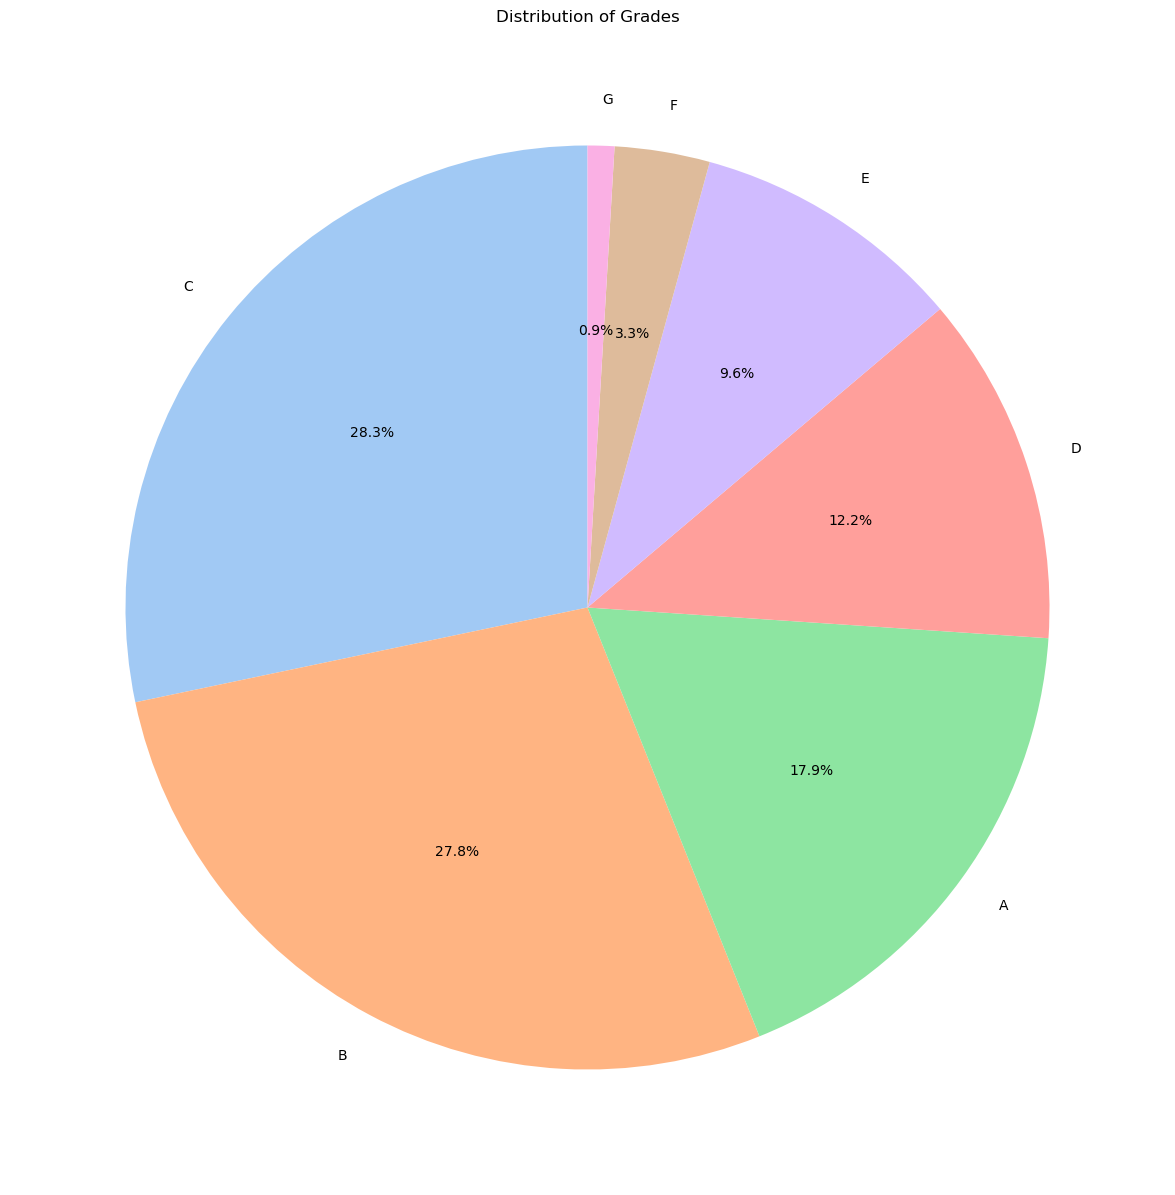

In [70]:
import matplotlib.pyplot as plt

# Extract unique grades
unique_grades = df['Grade'].unique()

# Display unique grades
print("Unique Grades Assigned by the Bank:")
print(unique_grades)

# Plot a pie chart for the distribution of grades
plt.figure(figsize=(15, 15))
plt.pie(df['Grade'].value_counts(), labels=df['Grade'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Grades')
plt.show()

## Data Pre-Processing

**Finding if there are any missing records**

In [20]:
# Find missing data in each column
missing_data = df.isnull()

# Count missing values for each column
missing_counts = missing_data.sum()

# Calculate percentage of missing values for each column
missing_percentage = (missing_counts / len(df)) * 100

# Create a DataFrame to store missing data information
missing_info = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage Missing': missing_percentage
})

# Display missing data information
print("\nMissing Data Information:")
print(missing_info)

# Save the missing data information DataFrame to a new CSV file
missing_info.to_csv('missing_data_information.csv')


Missing Data Information:
                              Missing Values  Percentage Missing
ID                                         0                 0.0
Loan Amount                                0                 0.0
Funded Amount                              0                 0.0
Funded Amount Investor                     0                 0.0
Term                                       0                 0.0
Batch Enrolled                             0                 0.0
Interest Rate                              0                 0.0
Grade                                      0                 0.0
Sub Grade                                  0                 0.0
Employment Duration                        0                 0.0
Home Ownership                             0                 0.0
Verification Status                        0                 0.0
Payment Plan                               0                 0.0
Loan Title                                 0                 0.

**Since there are no missing values we move onto the next step, that is, Numerical Encoding of Categorical Variables or Features.**

**Numerical Encoding of Categorical Variables**

In [56]:
# Selecting categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate the number of unique values in each categorical column
unique_values_categorical = df[categorical_columns].nunique().reset_index()
unique_values_categorical.columns = ['Feature', 'Number_of_Unique_Values']

# Display the number of unique values
print("No. of categorical variables:", len(categorical_columns))
print(unique_values_categorical)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a copy of the DataFrame to avoid modifying the original
encoded_df = df.copy()

# Iterate through each categorical column in the DataFrame
mapping = {}  # To store the mapping of variable names to numeric representation

for column in categorical_columns:
    # Perform numerical encoding
    encoded_df[column + '_encoded'] = label_encoder.fit_transform(df[column])

    # Store the mapping information
    mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the mapping
for variable, variable_mapping in mapping.items():
    print(f"\nMapping for {variable}:")
    print(variable_mapping)

# Display the encoded DataFrame
print(encoded_df)

No. of categorical variables: 9
               Feature  Number_of_Unique_Values
0       Batch Enrolled                       41
1                Grade                        7
2            Sub Grade                       35
3  Employment Duration                        3
4  Verification Status                        3
5         Payment Plan                        1
6           Loan Title                      109
7  Initial List Status                        2
8     Application Type                        2

Mapping for Batch Enrolled:
{'BAT1104812': 0, 'BAT1135695': 1, 'BAT1184694': 2, 'BAT1467036': 3, 'BAT1586599': 4, 'BAT1761981': 5, 'BAT1766061': 6, 'BAT1780517': 7, 'BAT1930365': 8, 'BAT2003848': 9, 'BAT2078974': 10, 'BAT2136391': 11, 'BAT224923': 12, 'BAT2252229': 13, 'BAT2333412': 14, 'BAT2428731': 15, 'BAT2522922': 16, 'BAT2558388': 17, 'BAT2575549': 18, 'BAT2803411': 19, 'BAT2833642': 20, 'BAT3193689': 21, 'BAT3461431': 22, 'BAT3726927': 23, 'BAT3865626': 24, 'BAT3873588': 25, '

**Outlier Statistics and Treatment**

Outlier counts in non-categorical variables:
Delinquency - two years         15409
Inquires - six months            6977
Cluster                          6791
Loan Status                      6241
Open Account                     5614
Loan Title_encoded               5045
Total Received Interest          4978
Total Collection Amount          4790
Public Record                    4592
Home Ownership                   4115
Revolving Balance                3719
Total Received Late Fee          3374
Funded Amount Investor           3103
Total Revolving Credit Limit     2689
Recoveries                       2302
Total Current Balance            1971
Term                             1457
Collection 12 months Medical     1437
Total Accounts                   1424
Interest Rate                     851
Collection Recovery Fee           809
Sub Grade_encoded                 284
Application Type_encoded          123
Accounts Delinquent                 0
Last week Pay                       0
Loan 

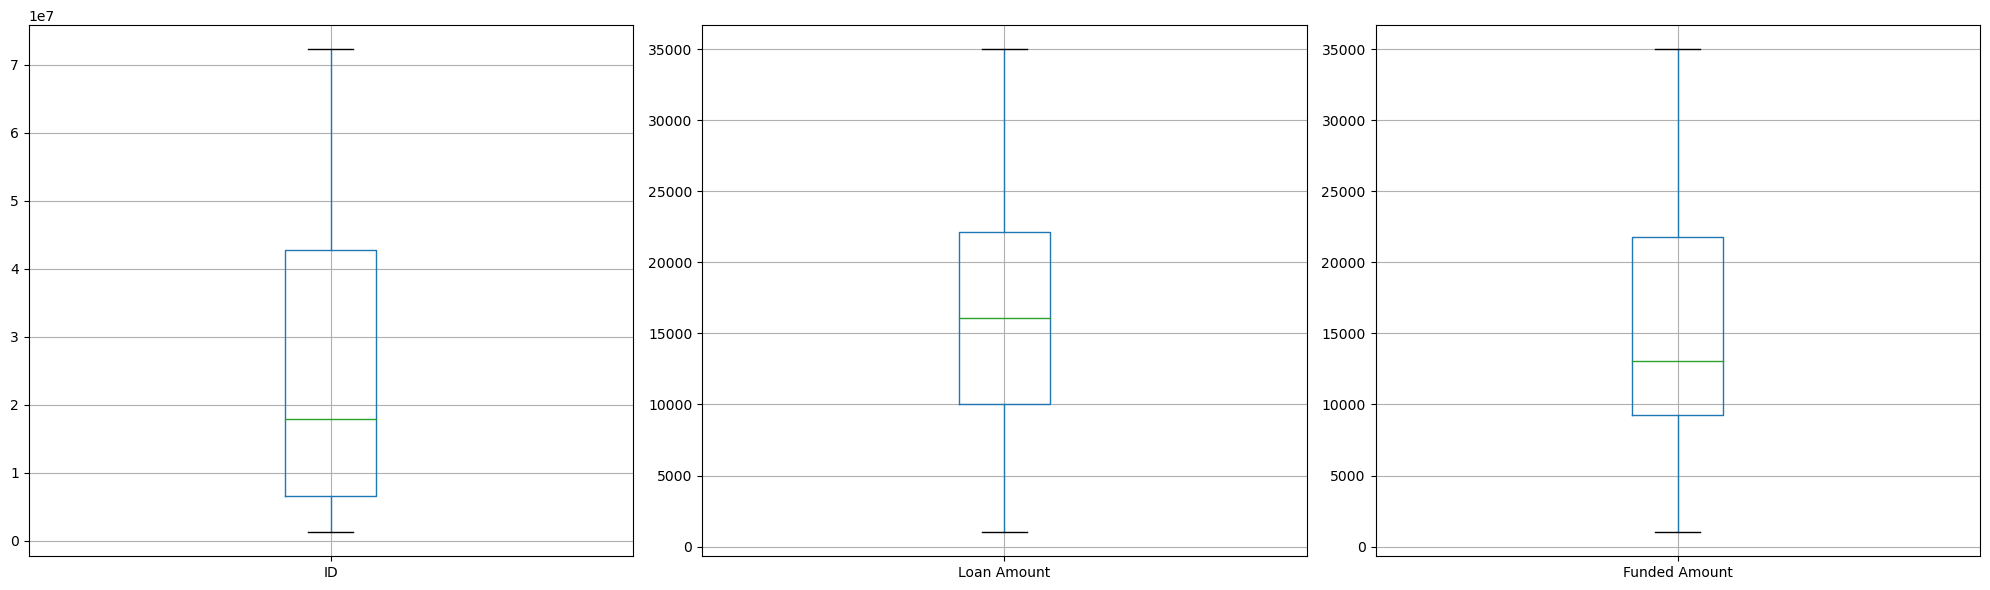

Applying Min-Max Scaler

First few rows of the scaled DataFrame:
         ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0  0.899103     0.264403       0.918699                0.330964   1.0   
1  0.002146     0.076355       0.321495                0.326910   1.0   
2  0.009460     0.802154       0.244137                0.604649   1.0   
3  0.075457     0.298829       0.174783                0.494688   1.0   
4  0.184033     0.467134       0.359335                0.366690   1.0   

  Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  ...  \
0     BAT2522922       0.265983     B        C4            MORTGAGE  ...   
1     BAT1586599       0.316414     C        D3                RENT  ...   
2     BAT2136391       0.330517     F        D4            MORTGAGE  ...   
3     BAT2428731       0.521957     C        C3            MORTGAGE  ...   
4     BAT5341619       0.443150     C        D4            MORTGAGE  ...   

   Batch Enrolled_encoded Grade_encoded

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Identify non-categorical columns
non_categorical_columns = df.select_dtypes(include=[np.number]).columns

# Find outliers using the IQR method
Q1 = df[non_categorical_columns].quantile(0.25)
Q3 = df[non_categorical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[non_categorical_columns] < (Q1 - 1.5 * IQR)) | (df[non_categorical_columns] > (Q3 + 1.5 * IQR)))

# Outlier statistics
outlier_stats = outliers.sum().sort_values(ascending=False)
print("Outlier counts in non-categorical variables:")
print(outlier_stats)

# Plot box plots for visualization
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
for i, col in enumerate(non_categorical_columns[:3]):
    df.boxplot(column=col, ax=ax[i])
plt.tight_layout()
plt.show()

print("Applying Min-Max Scaler")

# Apply Min-Max Scaler normalization
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[non_categorical_columns] = scaler.fit_transform(df_scaled[non_categorical_columns])

# Display the first few rows of the scaled DataFrame
print("\nFirst few rows of the scaled DataFrame:")
print(df_scaled.head())

In [23]:
import pandas as pd
from scipy.stats import chi2_contingency, f_oneway

# Continuous variables
continuous_vars = ['Loan Amount', 'Interest Rate', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical', 'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit']

# Categorical variables
categorical_vars = ['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration', 'Home Ownership', 'Verification Status', 'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type']

# ANOVA for continuous variables
for var in continuous_vars:
    anova_result = f_oneway(*[df[df['Loan Status'] == status][var] for status in df['Loan Status'].unique()])
    print(f"ANOVA for '{var}':")
    print("F-statistic:", anova_result.statistic)
    print("p-value:", anova_result.pvalue)
    print()

# Chi-square test of independence for categorical variables
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['Loan Status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for '{var}':")
    print("Chi-square statistic:", chi2)
    print("p-value:", p)
    print()


ANOVA for 'Loan Amount':
F-statistic: 1.3497414419708047
p-value: 0.24532743370121238

ANOVA for 'Interest Rate':
F-statistic: 0.5672924489885327
p-value: 0.4513394637979872

ANOVA for 'Debit to Income':
F-statistic: 0.6305790866317666
p-value: 0.42714577391898256

ANOVA for 'Delinquency - two years':
F-statistic: 6.733742928025199
p-value: 0.009462634922992178

ANOVA for 'Inquires - six months':
F-statistic: 0.02255609172807902
p-value: 0.8806176446325595

ANOVA for 'Open Account':
F-statistic: 3.3747499855303187
p-value: 0.06620701987720404

ANOVA for 'Public Record':
F-statistic: 7.5669585924264
p-value: 0.005946386493849328

ANOVA for 'Revolving Balance':
F-statistic: 0.07770315049985506
p-value: 0.780435356532883

ANOVA for 'Revolving Utilities':
F-statistic: 1.1450471079340925
p-value: 0.284592197210366

ANOVA for 'Total Accounts':
F-statistic: 0.0033232936986371717
p-value: 0.954029173097918

ANOVA for 'Total Received Interest':
F-statistic: 0.19030977617334202
p-value: 0.662660

D:\ANACONDA\lib\site-packages\scipy\stats\_stats_py.py:3903: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


ANOVA for 'Total Revolving Credit Limit':
F-statistic: 0.1425516916684968
p-value: 0.7057585361554068

Chi-square test for 'Batch Enrolled':
Chi-square statistic: 40.33203503167361
p-value: 0.4555732749097418

Chi-square test for 'Grade':
Chi-square statistic: 14.024785837884542
p-value: 0.0293605144624493

Chi-square test for 'Sub Grade':
Chi-square statistic: 33.22818832002119
p-value: 0.5052675609219769

Chi-square test for 'Employment Duration':
Chi-square statistic: 16.101583241640988
p-value: 0.000318849414713897

Chi-square test for 'Home Ownership':
Chi-square statistic: 67451.08841363099
p-value: 0.5013521987373524

Chi-square test for 'Verification Status':
Chi-square statistic: 0.6606479264176166
p-value: 0.718690866314581

Chi-square test for 'Payment Plan':
Chi-square statistic: 0.0
p-value: 1.0

Chi-square test for 'Loan Title':
Chi-square statistic: 126.9083832920198
p-value: 0.1032824198045893

Chi-square test for 'Initial List Status':
Chi-square statistic: 12.10144305

**Significant Variables from ANOVA Tests:**

'Delinquency - two years': This variable has a significantly low p-value (p < 0.05), indicating that there is a significant difference in the mean delinquency rate between defaulters and non-defaulters.

'Public Record': Similar to 'Delinquency - two years', this variable also has a significantly low p-value, indicating a significant difference in the mean number of derogatory public records between defaulters and non-defaulters.

'Total Received Late Fee': The p-value is significant (p < 0.05), suggesting a difference in the mean total received late fees between defaulters and non-defaulters.

'Total Collection Amount': This variable also has a significant p-value, suggesting a difference in the mean total collection amount between defaulters and non-defaulters.

'Total Current Balance': Similar to the above variables, this variable has a significant p-value, indicating a difference in the mean total current balance between defaulters and non-defaulters.

**Significant Variables from Chi-square Tests:**

'Grade': The chi-square test result indicates a significant association between the grade given by the bank and loan default status. This suggests that the grade could be a good predictor for clustering.

'Employment Duration': There is a significant association between employment duration and loan default status.

'Initial List Status': The chi-square test result indicates a significant association between the initial listing status of the loan and loan default status.

**Explanation:**

Variables identified as significant in the tests are likely to have a strong influence on the loan default status. Therefore, these variables are good candidates for clustering as they can effectively distinguish between defaulters and non-defaulters. By clustering based on these variables, we can potentially identify different risk profiles or patterns among the loan applicants, which can aid in risk assessment and decision-making processes within the lending institution.

**Performing k-means clustering on identified variables with k=2,3,4,5 and evaluating using SS score, Silhouette Score, and Davies-Boudin Score**

C:\Users\visha\AppData\Local\Temp\ipykernel_23472\3250782469.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset.dropna(inplace=True)


Memory usage before execution: 77.57421875 MiB
Memory usage after execution: 86.2734375 MiB
Execution time: 0.19103455543518066 seconds
Cluster sizes for k=2: {0: 64676, 1: 2787}


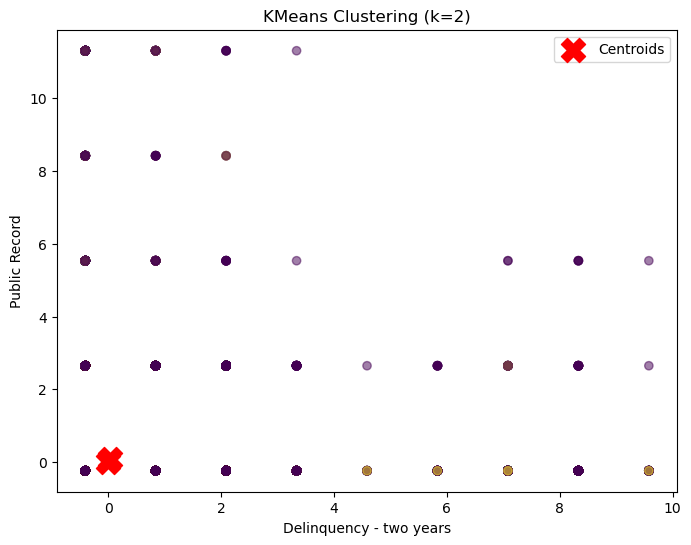

Cluster sizes for k=3: {0: 17421, 1: 47293, 2: 2749}


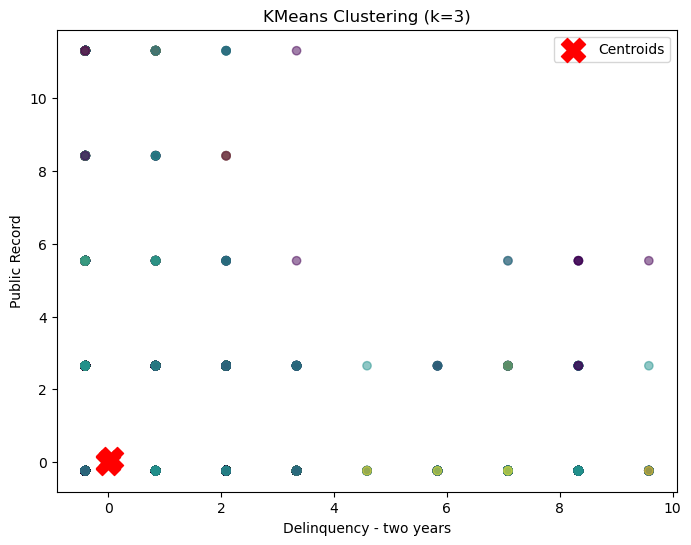

Cluster sizes for k=4: {0: 16316, 1: 44084, 2: 2682, 3: 4381}


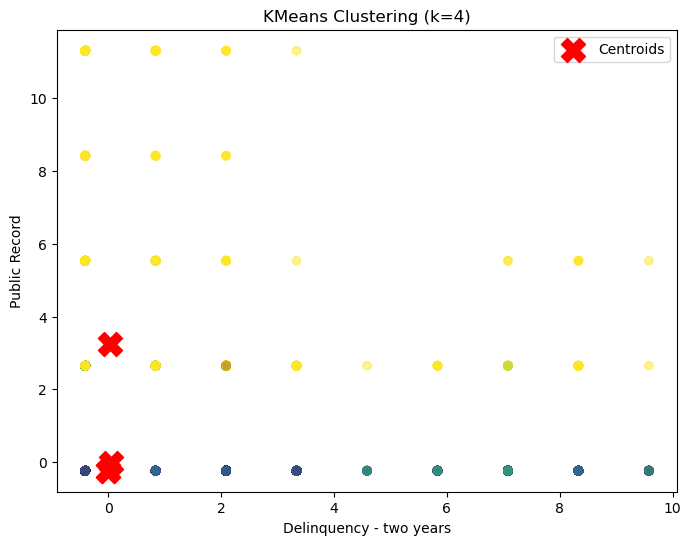

Cluster sizes for k=5: {0: 44001, 1: 16247, 2: 2670, 3: 183, 4: 4362}


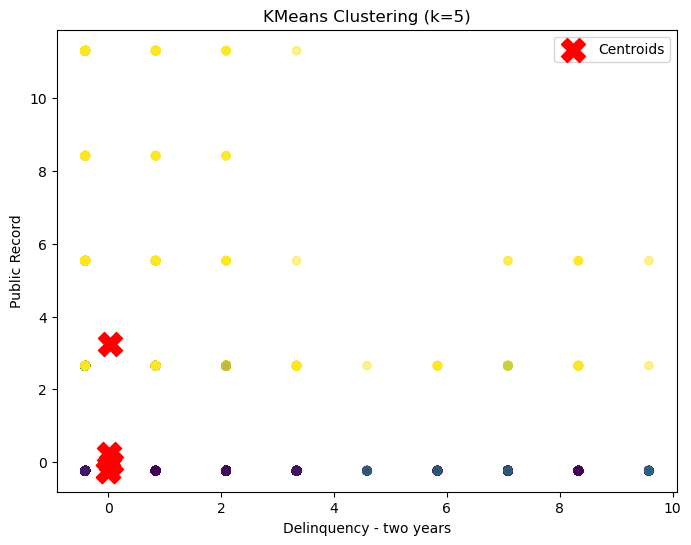

k=2: SS Score=358368.19, Silhouette Score=0.53, Davies-Bouldin Score=0.91
k=3: SS Score=315457.31, Silhouette Score=0.24, Davies-Bouldin Score=1.59
k=4: SS Score=269486.90, Silhouette Score=0.25, Davies-Bouldin Score=1.33
k=5: SS Score=224509.29, Silhouette Score=0.25, Davies-Bouldin Score=1.10

Best k based on Silhouette Score is 2
Best k based on Davies-Bouldin Score is 2
Best k based on SS Score is 5


In [71]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time
from memory_profiler import memory_usage

# Selecting variables for clustering
selected_variables = ['Delinquency - two years', 'Public Record', 'Total Received Late Fee', 
                      'Total Collection Amount', 'Total Current Balance', 'Grade', 
                      'Employment Duration', 'Initial List Status']

# Subsetting the dataframe with selected variables
data_subset = df[selected_variables]

# Handling missing values if any
data_subset.dropna(inplace=True)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), selected_variables[0:5]),
        ('cat', OneHotEncoder(drop='first'), selected_variables[5:])
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Measure memory usage and execution time
start_time = time.time()
mem_usage_before = memory_usage(-1)
data_scaled = pipeline.fit_transform(data_subset)
end_time = time.time()
mem_usage_after = memory_usage(-1)

# Print memory usage and execution time
print(f"Memory usage before execution: {mem_usage_before[0]} MiB")
print(f"Memory usage after execution: {mem_usage_after[0]} MiB")
print(f"Execution time: {end_time - start_time} seconds")

# List to store evaluation metrics for different k values
ss_scores = []
silhouette_scores = []
davies_bouldin_scores = []
k_values = [2, 3, 4, 5]

# Loop through different values of k
for k in k_values:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    
    # Evaluation Metrics
    ss = kmeans.inertia_  # Sum of Squared Distances to Closest Cluster Center
    silhouette = silhouette_score(data_scaled, cluster_labels)
    davies_bouldin = davies_bouldin_score(data_scaled, cluster_labels)
    
    # Append scores to respective lists
    ss_scores.append(ss)
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)
    
    # Get cluster sizes
    unique, counts = np.unique(cluster_labels, return_counts=True)
    cluster_sizes = dict(zip(unique, counts))
    print(f"Cluster sizes for k={k}: {cluster_sizes}")
    
    # Visualize clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
    plt.title(f'KMeans Clustering (k={k})')
    plt.xlabel(selected_variables[0])
    plt.ylabel(selected_variables[1])
    plt.legend()
    plt.show()

# Display the metrics
for k, ss, silhouette, db in zip(k_values, ss_scores, silhouette_scores, davies_bouldin_scores):
    print(f"k={k}: SS Score={ss:.2f}, Silhouette Score={silhouette:.2f}, Davies-Bouldin Score={db:.2f}")

# Determine the best k based on Silhouette Score (higher is better) and Davies-Bouldin Score (lower is better)
best_k_silhouette = k_values[np.argmax(silhouette_scores)]
best_k_db = k_values[np.argmin(davies_bouldin_scores)]
best_k_ss = k_values[np.argmin(ss_scores)]

print(f"\nBest k based on Silhouette Score is {best_k_silhouette}")
print(f"Best k based on Davies-Bouldin Score is {best_k_db}")
print(f"Best k based on SS Score is {best_k_ss}")


C:\Users\visha\AppData\Local\Temp\ipykernel_23472\574475381.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset.dropna(inplace=True)


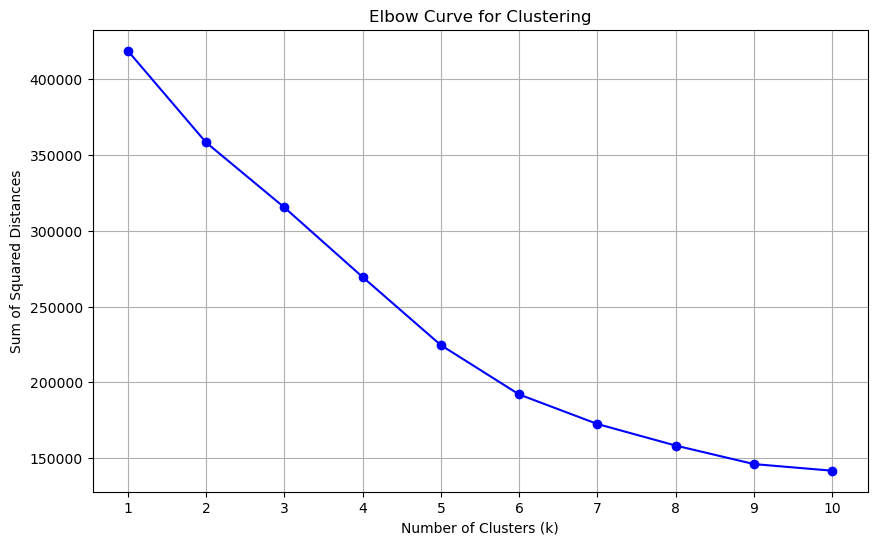

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time

# Selecting variables for clustering
selected_variables = ['Delinquency - two years', 'Public Record', 'Total Received Late Fee', 
                      'Total Collection Amount', 'Total Current Balance', 'Grade', 
                      'Employment Duration', 'Initial List Status']

# Subsetting the dataframe with selected variables
data_subset = df[selected_variables]

# Handling missing values if any
data_subset.dropna(inplace=True)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), selected_variables[0:5]),
        ('cat', OneHotEncoder(drop='first'), selected_variables[5:])
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Execute the preprocessing pipeline
data_scaled = pipeline.fit_transform(data_subset)

# List to store sum of squared distances for different k values
ss_scores = []
k_values = range(1, 11)  # Try k from 1 to 10

# Loop through different values of k
for k in k_values:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    # Append the sum of squared distances to the list
    ss_scores.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, ss_scores, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [78]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant columns for clustering
selected_columns = [
    'Delinquency - two years', 'Public Record', 'Total Received Late Fee',
    'Total Collection Amount', 'Total Current Balance'
]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[selected_columns])

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Print characteristics of each cluster
for cluster_id in range(kmeans.n_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id + 1} Characteristics:")
    print(f"Number of representatives: {len(cluster_data)}")
    print(f"Average Delinquency: {cluster_data['Delinquency - two years'].mean()}")
    print(f"Average Public Record: {cluster_data['Public Record'].mean()}")
    print(f"Average Late Fee: {cluster_data['Total Received Late Fee'].mean()}")
    print(f"Average Collection Amount: {cluster_data['Total Collection Amount'].mean()}")
    print(f"Average Current Balance: {cluster_data['Total Current Balance'].mean()}")
    print(f"Grade Distribution: {cluster_data['Grade'].value_counts()}")
    print(f"Employment Duration Distribution: {cluster_data['Employment Duration'].value_counts()}")
    print(f"Initial List Status Distribution: {cluster_data['Initial List Status'].value_counts()}")
    print("\n")

# Print defining characteristics of each cluster
for cluster_id in range(kmeans.n_clusters):
    cluster_center = kmeans.cluster_centers_[cluster_id]
    defining_features = [selected_columns[i] for i in np.argsort(cluster_center)]
    print(f"Defining characteristics of Cluster {cluster_id + 1}:")
    print(defining_features)
    print("\n")

Cluster 1 Characteristics:
Number of representatives: 64677
Average Delinquency: 0.3258809159361133
Average Public Record: 0.08005937195602765
Average Late Fee: 0.1130605025781029
Average Collection Amount: 145.11260571764305
Average Current Balance: 159618.53420845122
Grade Distribution: C    18350
B    18022
A    11533
D     7931
E     6136
F     2124
G      581
Name: Grade, dtype: int64
Employment Duration Distribution: MORTGAGE    34824
RENT        23199
OWN          6654
Name: Employment Duration, dtype: int64
Initial List Status Distribution: w    34813
f    29864
Name: Initial List Status, dtype: int64


Cluster 2 Characteristics:
Number of representatives: 2786
Average Delinquency: 0.3560660445082556
Average Public Record: 0.11342426417803302
Average Late Fee: 25.076504444659058
Average Collection Amount: 177.9332376166547
Average Current Balance: 158538.5312275664
Grade Distribution: C    735
B    720
A    522
D    328
E    310
F    122
G     49
Name: Grade, dtype: int64
Emplo

In [69]:
from scipy.stats import chi2_contingency, f_oneway

# Define the selected variables
selected_variables = ['Delinquency - two years', 'Public Record', 'Total Received Late Fee', 
                      'Total Collection Amount', 'Total Current Balance', 'Grade', 
                      'Employment Duration', 'Initial List Status']

# Loop through each variable
for var in selected_variables:
    print(f"\nVariable: {var}")
    
    # Chi-square test for categorical variables
    if df[var].dtype == 'object':
        contingency_table = pd.crosstab(df[var], kmeans.labels_)
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        print("Chi-square test:")
        print(f"Chi-square statistic: {chi2}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print(f"{var} is distinguishing clusters.")
        else:
            print(f"{var} is not distinguishing clusters.")
    
    # ANOVA for numerical variables
    else:
        cluster_groups = [data_scaled[kmeans.labels_ == i][:, selected_variables.index(var)] for i in range(2)]
        f_statistic, p_value = f_oneway(*cluster_groups)
        
        print("ANOVA:")
        print(f"F-statistic: {f_statistic}")
        print(f"p-value: {p_value}")
        
        if p_value < 0.05:
            print(f"{var} is distinguishing clusters.")
        else:
            print(f"{var} is not distinguishing clusters.")


Variable: Delinquency - two years
ANOVA:
F-statistic: 11508.614047232439
p-value: 0.0
Delinquency - two years is distinguishing clusters.

Variable: Public Record
ANOVA:
F-statistic: 160.99545891053108
p-value: 1.035931172020656e-36
Public Record is distinguishing clusters.

Variable: Total Received Late Fee
ANOVA:
F-statistic: 0.2436485830189447
p-value: 0.6215901099952558
Total Received Late Fee is not distinguishing clusters.

Variable: Total Collection Amount
ANOVA:
F-statistic: 1.8213776621755122
p-value: 0.17716872083319038
Total Collection Amount is not distinguishing clusters.

Variable: Total Current Balance
ANOVA:
F-statistic: 57059.48415899811
p-value: 0.0
Total Current Balance is distinguishing clusters.

Variable: Grade
Chi-square test:
Chi-square statistic: 34484.301683665544
p-value: 0.0
Grade is distinguishing clusters.

Variable: Employment Duration
Chi-square test:
Chi-square statistic: 359.07753680179377
p-value: 2.9835156284390058e-65
Employment Duration is disting

# **Report** #

**Dataset Description**

The Dataset has the following variables-

ID (Int) ---> unique ID of representative

Loan Amount (Int) ---> loan amount applied

Funded Amount (Int) ---> loan amount funded

Funded Amount Investor (Float) ---> loan amount approved by the investors

Term (Int) ---> term of loan (in months)

Batch Enrolled (Object) ---> batch numbers to representatives

Interest Rate (Float) ---> interest rate (%) on loan

Grade (Object) ---> grade by the bank

Sub Grade (Object) ---> sub-grade by the bank

Employment Duration (Object) ---> duration

Home Ownership (Float) ---> Owner ship of home

Verification Status (Object) ---> Income verification by the bank

Payment Plan (Object) ---> if any payment plan has started against loan

Loan Title (Object) ---> loan title provided

Debit to Income (Float) ---> ratio of representative's total monthly debt repayment (divided by self reported monthly income excluding mortgage)

Delinquency - two years (Int) ---> number of 30+ days delinquency in past 2 years

Inquires - six months (Int) ---> total number of inquiries in last 6 months

Open Account (Int) ---> number of open credit line in representative's credit line

Public Record (Int) ---> number of derogatory public records

Revolving Balance (Int) ---> total credit revolving balance

Revolving Utilities (Float) ---> amount of credit a representative is using relative to revolving_balance

Total Accounts (Int) ---> total number of credit lines available in representatives credit line

Initial List Status (Object) ---> unique listing status of the loan - W(Waiting), F(Forwarded)

Total Received Interest (Float) ---> total interest received till date

Total Received Late Fee (Float) ---> total late fee received till date

Recoveries (Float) ---> post charge off gross recovery

Collection Recovery Fee (Float) ---> post charge off collection fee

Collection 12 months Medical (Int) ---> total collections in last 12 months excluding medical collections

Application Type (Object) ---> indicates when the representative is an individual or joint

Last week Pay (Int) ---> indicates how long (in weeks) a representative has paid EMI after batch enrolled

Accounts Delinquent (Int) ---> number of accounts on which the representative is delinquent

Total Collection Amount (Int) ---> total current balance from all accounts

Total Current Balance (Int) ---> total current balance from all accounts

Total Revolving Credit Limit (Int) ---> total revolving credit limit

Loan Status (Int) ---> 1 = Defaulter, 0 = Non Defaulters

The goal of this report is to identify the variables using which we can segment customers and find out if they can be given a loan by the bank, as a defaults on loans can cost banks a huge amount of money.

**Findings**

**Size-**

Size of Dataset is 16484188 bytes

Size of Dataset is 15 MB

**Dataset shape -  (67463, 35)**

**Code to identify variable type -**

CV - Categorical Variable

CNV - Categorical Nominal Variable

COV - Categorical Ordinal Variable

NCV - Non-Categorical Variable

ID: NCV1

Loan Amount: NCV2

Funded Amount: NCV3

Funded Amount Investor: NCV4

Term: NCV5

Batch Enrolled: COV1

Interest Rate: NCV6

Grade: CNV1

Sub Grade: COV2

Employment Duration: CNV2

Home Ownership: NCV7

Verification Status: CNV3

Payment Plan: CV

Loan Title: COV3

Debit to Income: NCV8

Delinquency - two years: NCV9

Inquires - six months: NCV10

Open Account: NCV11

Public Record: NCV12

Revolving Balance: NCV13

Revolving Utilities: NCV14

Total Accounts: NCV15

Initial List Status: CV

Total Received Interest: NCV16

Total Received Late Fee: NCV17

Recoveries: NCV18

Collection Recovery Fee: NCV19

Collection 12 months Medical: NCV20

Application Type: CV

Last week Pay: NCV21

Accounts Delinquent: NCV22

Total Collection Amount: NCV23

Total Current Balance: NCV24

Total Revolving Credit Limit: NCV25

Loan Status: NCV26

We perform ANOVA and Chi-Square test of independence to find the variables with strongest association to Loan Status.

**Findings-**

**Significant Variables from ANOVA Tests:**

'Delinquency - two years': This variable has a significantly low p-value (p < 0.05), indicating that there is a significant difference in the mean delinquency rate between defaulters and non-defaulters.

'Public Record': Similar to 'Delinquency - two years', this variable also has a significantly low p-value, indicating a significant difference in the mean number of derogatory public records between defaulters and non-defaulters.

'Total Received Late Fee': The p-value is significant (p < 0.05), suggesting a difference in the mean total received late fees between defaulters and non-defaulters.

'Total Collection Amount': This variable also has a significant p-value, suggesting a difference in the mean total collection amount between defaulters and non-defaulters.

'Total Current Balance': Similar to the above variables, this variable has a significant p-value, indicating a difference in the mean total current balance between defaulters and non-defaulters.

**Significant Variables from Chi-square Tests:**

'Grade': The chi-square test result indicates a significant association between the grade given by the bank and loan default status. This suggests that the grade could be a good predictor for clustering.

'Employment Duration': There is a significant association between employment duration and loan default status.

'Initial List Status': The chi-square test result indicates a significant association between the initial listing status of the loan and loan default status.

Hence, K-Means Clustering is done on the variables - **['Delinquency - two years', 'Public Record', 'Total Received Late Fee', 'Total Collection Amount', 'Total Current Balance', 'Grade', 'Employment Duration', 'Initial List Status']**

We perform K-means clustering using **k=2,3,4,5** to find the best **k** using various parameters such as **Silhouette Score, Davies-Bouldin Score, SS Score, and also analysing using Elbow-Curve**.

**Results from K-Means Clustering-**

k=2: SS Score=358368.19, Silhouette Score=0.53, Davies-Bouldin Score=0.91

k=3: SS Score=315457.31, Silhouette Score=0.24, Davies-Bouldin Score=1.59

k=4: SS Score=269486.90, Silhouette Score=0.25, Davies-Bouldin Score=1.33

k=5: SS Score=224509.29, Silhouette Score=0.25, Davies-Bouldin Score=1.10

In clustering-

**For Silhouette Score**, a higher score is better as the silhouette score provides insight into the cohesion and separation of data points within clusters. Specifically, it quantifies the degree to which each item aligns with its own cluster in relation to other clusters. A silhouette score closer to 1 signifies that data points within clusters exhibit strong internal cohesion and are distinctly separated from adjacent clusters. This indicates that the clustering is effective, and the data points are distinctly and accurately assigned to their respective clusters. A higher Silhouette Score indicates better-defined clusters with more significant separation between them.

**For Davis-Bouldin Score**, a lower score is better as The Davies-Bouldin Score is a metric used to assess the quality of clustering in a dataset. It quantifies the compactness of clusters and the separation between them, offering a concise measure of clustering effectiveness. A lower Davies-Bouldin Score indicates better-defined and more separated clusters, signifying a more robust and accurate clustering solution. This metric aids practitioners in selecting an optimal clustering algorithm or determining the appropriate number of clusters for a given dataset. Lower values of the Davies-Bouldin Index indicate better clustering, where clusters are well-separated and compact.

**For SS Score**, a lower score is better as it quantifies how well the data points within each cluster are grouped around their centroid.

Best k based on Silhouette Score is 2

Best k based on Davies-Bouldin Score is 2

Best k based on SS Score is 5

Analysing the **Elbow-Curve** it can concluded that best k for clustering is **k=2**.

**Cluster Sizes-**

For k=2: {0: 64676, 1: 2787}

For k=3: {0: 17421, 1: 47293, 2: 2749}

For k=4: {0: 16316, 1: 44084, 2: 2682, 3: 4381}

For k=5: {0: 44001, 1: 16247, 2: 2670, 3: 183, 4: 4362}

**Time and Memory Statistics-**

Memory usage before execution: 77.57421875 MiB

Memory usage after execution: 86.2734375 MiB

Execution time: 0.19103455543518066 seconds

**Clsuter Characteristics-**

Cluster 1 Characteristics:

Number of representatives: 64677

Average Delinquency: 0.3258809159361133

Average Public Record: 0.08005937195602765

Average Late Fee: 0.1130605025781029

Average Collection Amount: 145.11260571764305

Average Current Balance: 159618.53420845122

Grade Distribution: C    18350

B    18022

A    11533

D     7931

E     6136

F     2124

G      581

Name: Grade, dtype: int64

Employment Duration Distribution: MORTGAGE    34824

RENT        23199

OWN          6654

Name: Employment Duration, dtype: int64

Initial List Status Distribution: w    34813

f    29864

Name: Initial List Status, dtype: int64


Cluster 2 Characteristics:

Number of representatives: 2786

Average Delinquency: 0.3560660445082556

Average Public Record: 0.11342426417803302

Average Late Fee: 25.076504444659058

Average Collection Amount: 177.9332376166547

Average Current Balance: 158538.5312275664

Grade Distribution: C    735

B    720

A    522

D    328

E    310

F    122

G     49

Name: Grade, dtype: int64

Employment Duration Distribution: MORTGAGE    1527

RENT         951

OWN          308

Name: Employment Duration, dtype: int64

Initial List Status Distribution: w    1486

f    1300

Name: Initial List Status, dtype: int64

Defining characteristics of Cluster 1:
['Total Received Late Fee', 'Public Record', 'Total Collection Amount', 'Delinquency - two years', 'Total Current Balance']

Defining characteristics of Cluster 2:
['Total Current Balance', 'Delinquency - two years', 'Total Collection Amount', 'Public Record', 'Total Received Late Fee']

**Findings for Distinguishing features using ANOVA and Chi-Square Test-**

**Variable: Delinquency - two years**

**ANOVA:**

F-statistic: 11508.614047232439

p-value: 0.0

Delinquency - two years is distinguishing clusters.

**Variable: Public Record**

**ANOVA:**

F-statistic: 160.99545891053108

p-value: 1.035931172020656e-36

Public Record is distinguishing clusters.

**Variable: Total Received Late Fee**

**ANOVA:**

F-statistic: 0.2436485830189447

p-value: 0.6215901099952558

Total Received Late Fee is not distinguishing clusters.

**Variable: Total Collection Amount**

**ANOVA:**

F-statistic: 1.8213776621755122

p-value: 0.17716872083319038

Total Collection Amount is not distinguishing clusters.

**Variable: Total Current Balance**

**ANOVA:**

F-statistic: 57059.48415899811

p-value: 0.0

Total Current Balance is distinguishing clusters.

**Variable: Grade**

**Chi-square test:**

Chi-square statistic: 34484.301683665544

p-value: 0.0

Grade is distinguishing clusters.


**Variable: Employment Duration**

**Chi-square test:**

Chi-square statistic: 359.07753680179377

p-value: 2.9835156284390058e-65

Employment Duration is distinguishing clusters.

**Variable: Initial List Status**

**Chi-square test:**

Chi-square statistic: 350.59939537669914

p-value: 4.619620741648456e-70

Initial List Status is distinguishing clusters.

**CONCLUSION**

1. **Cluster Analysis Findings:** The K-means clustering analysis identified two distinct clusters based on the selected variables. Cluster 1 comprises a larger number of representatives (64677) with relatively lower average delinquency, public record, and late fees, indicating a lower default risk. In contrast, Cluster 2 consists of fewer representatives (2786) with slightly higher average delinquency and public record, indicating a higher default risk. The defining characteristics of Cluster 1 include a higher total received late fee and lower total current balance, while Cluster 2 is characterized by a higher total current balance and lower total received late fee.

2. **Variable Significance:** ANOVA and Chi-square tests revealed significant associations between several variables and loan default status. Variables such as 'Delinquency - two years', 'Public Record', 'Total Current Balance', 'Grade', 'Employment Duration', and 'Initial List Status' were found to be significant predictors of loan default, as indicated by their low p-values and chi-square statistics.

3. **Time and Memory Usage:** The execution time for preprocessing and clustering was approximately 0.19 seconds, with a marginal increase in memory usage from 77.57 MiB to 86.27 MiB. These findings indicate that the analysis can be performed efficiently even on a large dataset.

4. **Delinquency Rate and Public Records Influence Loan Default Status:** Variables like "Delinquency - two years" and "Public Record" show significant differences between defaulters and non-defaulters, indicating that these factors strongly influence loan default status.

5. **Grade and Employment Duration are Predictive of Loan Default:** The variables "Grade" and "Employment Duration" exhibit a significant association with loan default status, suggesting that these attributes can be used as predictors for clustering customers based on their likelihood of defaulting on loans.

6. **K-Means Clustering Identifies Distinct Customer Segments:** Through K-means clustering, it was observed that clustering the representatives based on key variables like delinquency, public records, late fees, collection amounts, current balance, grade, employment duration, and initial list status resulted in distinct clusters with varying characteristics.

7. **Optimal Clustering at k=2:** The analysis indicates that the most effective clustering is achieved when k=2, as evidenced by metrics like Silhouette Score, Davies-Bouldin Score, and SS Score. This suggests that dividing the dataset into two clusters provides the most meaningful segmentation of customers.


**MANAGERIAL IMPLICATIONS**
1. **Enhanced Risk Assessment:** Banks can leverage the identified key variables, such as delinquency history, employment duration, and credit grade, to enhance risk assessment models. By incorporating these variables into credit scoring algorithms, banks can more accurately predict the likelihood of loan default and adjust lending terms accordingly.

2. **Targeted Customer Engagement:** Understanding the characteristics of each cluster allows banks to tailor their customer engagement strategies effectively. For instance, for high-risk clusters identified through clustering analysis, banks can implement proactive communication strategies, offer financial education programs, or provide personalized loan restructuring options to mitigate default risk.

3. **Optimized Collection Strategies:** By analyzing variables like late fees, total collection amounts, and current balances within clusters, banks can develop optimized collection strategies. For example, banks can prioritize collection efforts on accounts with higher delinquency rates or implement alternative repayment options for customers experiencing financial distress.

4. **Product Innovation and Customization:** Insights from clustering analysis enable banks to innovate and customize financial products and services to meet the diverse needs of different customer segments. For instance, banks can develop specialized loan products with flexible repayment terms tailored to the risk profiles of specific clusters, thereby improving customer satisfaction and loyalty.

5. **Continuous Monitoring and Adaptation:** Given the dynamic nature of financial markets and customer behaviors, banks must continuously monitor and adapt their risk management strategies. Regular updates to credit scoring models, clustering algorithms, and customer segmentation criteria ensure the relevance and effectiveness of risk mitigation efforts over time.

6. **Improved Loan Approval Processes:** Utilizing variables like employment duration and initial list status in loan approval processes can lead to more accurate assessments of customers' creditworthiness and improve decision-making regarding loan approvals.



